# Moving path Monte Carlo

We imagine a moving object taking GPS readings. The standard deviation of the coordinates gives the length scale. By digging around the numpy site, I could no doubt present that as data to the normal distribution being used. Also for the moving Monte Carlos, one might also be interested in giving a mean . . .

In [1]:
import numpy as np
rng = np.random.default_rng()

s=0
M=10 # number of paths
L=2. # movement per step or "speed"
def mcmob(L,N):
  X=rng.standard_normal(N)
  Y=rng.standard_normal(N)
  return [((X[k+1]-X[k]+L)**2+(Y[k+1]-Y[k])**2)**(1/2) for k in range(N-1)]

for m in range(M):
  N=10000
  S=mcmob(L,N) # evaluate distances
  print("Average",m,"over N:",sum(S)/(N-1)) # average per step
  s+=sum(S)/(N-1)

print("Average over M:",s/M)

Average 0 over N: 2.565815146621566
Average 1 over N: 2.564018818796381
Average 2 over N: 2.56923945897397
Average 3 over N: 2.575783971398854
Average 4 over N: 2.554382387974785
Average 5 over N: 2.5599585789111505
Average 6 over N: 2.5582006040880882
Average 7 over N: 2.5529268533683878
Average 8 over N: 2.56609425195256
Average 9 over N: 2.557910303817996
Average over M: 2.5624330375903734


In [2]:
from scipy.special import i0e,i1e,gamma
from math import pi

def T(n):
  return 2**n*gamma((n+1)/2)

def Theta0(s):
  return 2*pi*i0e(s**2/8)

def Theta2(s):
  z=s**2/8
  return pi*(i1e(z)+i0e(z))

def aDr(s):
  return (T(2)*Theta0(s)+s**2*T(0)*Theta2(s))/4/pi

In [3]:
import numpy as np

S=np.linspace(0,10,40)
D=aDr(S)

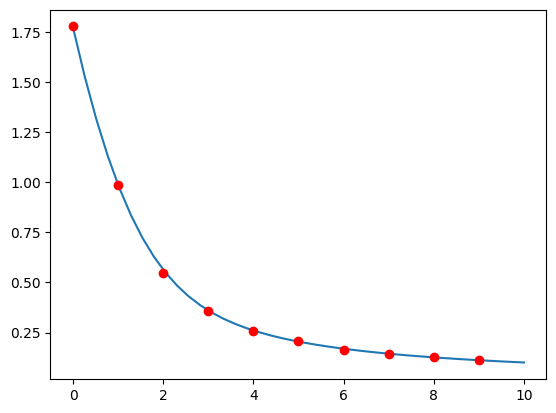

In [4]:
import matplotlib.pyplot as plt
n=100
plt.plot(S,D-S)
for s in range(10):
  plt.plot(s,sum(mcmob(s,N))/N-s,"ro")
plt.savefig("mobile.svg")